# __Scenario D:__<br>Time-dependent enzyme inactivation

Data provided by Paulo Durão (Microbial & Enzyme Technology, Instituto de Tecnologia Química e Biológica, Oeiras, Portugal)

## Project background
All investigated enzyme reaction without inhibitor showed progress curves behavior, which was not explainable by irreversible Michaelis-Menten kinetics. SUBSTRATE PRODUCT INHIBITION. All experiments had in commmon, that enzyme reactions were carried out in 96-well polystyrene micro titer plates (MTP), whereas the change in substrate and or product absorption was monitored photometrically. Initially, 
CotA laccase from *Bacillus subtilis*

__Show results of enzyme inactication across projects__ #TODO

All investigated enzyme reactions in this thesis showed a time-dependent decrease in catalytic activity, which was not explainable by the irreversible Michaelis-Menten model.

### Experimental design
__Determination of enzyme inactivation trough adsorption__  
In order to test the hypothesis of time-dependent enzyme inactivation in MTP-wells through adsorption, the following experiment was conducted. Thereby, enzyme solution was incubated in individual MTP wells up to 1 h, prior to reaction start.  Then, individual enzyme reactions were started by transferring 2 µL of incubated enzyme in 10 min increments. Each proceeding enzyme reaction contained 256 nM CotA, 1 mM ABTS and was buffered in acetate pH 4. Product formation was followed photometrically at 420 nm and 25°C for 5 min, whereas concentrations were calculated assuming an extincion coefficient of ε = 36000 M<sup>-1</sup>cm<sup>-1</sup> for the ABTS radical product.

__Enzyme kinetics experiment__  
The oxidation of ABTS by CotA was followed photometrically at

## Enzyme kinetics 

## Data Preparation

### Imports

In [90]:
import numpy as np
import pandas as pd
from scipy.stats import linregress
import pyenzyme as pe
from EnzymePynetics.tools.parameterestimator import ParameterEstimator
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from IPython.display import display


#TODO warning in EnzymePynetics

import warnings
warnings.filterwarnings('ignore')

### Experimantal data

Experimantal data was provided as an Excel file, containing time-course absorption data. Meta data was written into the EnzymeML Excel template. Then, the experimantal data was written to an EnzymeML document by a parser function. Concentrations were calculated via the provided extinction coefficient of the ABTS radical (ε = 36000 M<sup>-1</sup>cm<sup>-1</sup>). 

In [6]:
# Load experimental data from excel file
df = pd.read_excel("../../data/enzyme_inactivation/Repetition CotA ABTS kinetics higher volumes 2nd time.xlsx", sheet_name="csv").set_index("Time(min)")
data = df.values.T.reshape(8,4,72)
time = df.index.values

# Calculate concentrations
extinction_coefficient = 36 # (1/mM * 1/cm)
optical_length = 0.65 # cm

def absorption_to_concentration(abso):
    return abso / (extinction_coefficient*optical_length)

concentration_data = absorption_to_concentration(data)

# Parser function
def data_to_EnzymeML(
    template_path: str,
    measurement_data: np.ndarray,
    species_id: str,
    data_unit: str,
    time_unit: str
    ) -> pe.EnzymeMLDocument:

    enzmldoc = pe.EnzymeMLDocument.fromTemplate(template_path)
    for IDs, concentration in zip(enzmldoc.measurement_dict.keys(), measurement_data):
        for counter, replicate in enumerate(concentration):
            rep = pe.Replicate(
                id=f"Measurement{counter}",
                species_id=species_id,
                data=list(replicate),
                data_unit=data_unit,
                time=list(time),
                time_unit=time_unit)
            enzmldoc.getMeasurement(IDs).addReplicates(rep, enzmldoc)
    return enzmldoc

# Write experimantal data to EnzymeML document vis parser function
enzmldoc = data_to_EnzymeML(
    template_path="../../data/enzyme_inactivation/EnzymeML_CotA.xlsm",
    measurement_data=concentration_data,
    species_id="s1",
    data_unit="mmole / l",
    time_unit="min")

In [82]:
# Parameter estimation without time-dependent enzyme inactivation
CotA_kinetics = ParameterEstimator.from_EnzymeML(enzmldoc, "s1", "product")
CotA_kinetics.fit_models(enzyme_inactivation=False, display_output=False)
df = CotA_kinetics.result_dict.drop(columns=["kcat / Km [1/min * 1/mmole / l]"])
df.insert(1, "Enzyme inactivation model", "False")

# Parameter estimation considering time-dependent enzyme inactivation
CotA_kinetics_with_inactivation = ParameterEstimator.from_EnzymeML(enzmldoc, "s1", "product")
CotA_kinetics_with_inactivation.fit_models(enzyme_inactivation=True, display_output=False)
df_inactivation = CotA_kinetics_with_inactivation.result_dict.drop(columns=["kcat / Km [1/min * 1/mmole / l]"])
df_inactivation.insert(1, "Enzyme inactivation model", "True")

results = df.append(df_inactivation).sort_values("AIC")
display(results.style.set_table_attributes('style="font-size: 12px"'))

,AIC,Enzyme inactivation model,kcat [1/min],Km [mmole / l],Ki competitive [mmole / l],Ki uncompetitive [mmole / l],ki time-dep enzyme-inactiv. [1/min]
substrate inhibition,-29337,True,3.209 +/- 0.90%,0.047 +/- 1.73%,-,33.750 +/- 13.18%,0.007 +/- 4.12%
competitive product inhibition,-29300,True,3.058 +/- 0.80%,0.037 +/- 3.55%,0.074 +/- 26.83%,-,0.006 +/- 5.27%
non-competitive product inhibition,-29296,True,3.077 +/- 2.06%,0.037 +/- 5.14%,0.064 +/- 40.49%,0.984 +/- 297.88%,0.006 +/- 29.07%
irreversible Michaelis Menten,-29287,True,3.095 +/- 0.77%,0.043 +/- 1.30%,-,-,0.007 +/- 4.18%
uncompetitive product inhibition,-29283,True,3.102 +/- 0.99%,0.043 +/- 2.20%,-,3.259 +/- 198.94%,0.007 +/- 5.60%
non-competitive product inhibition,-29276,False,3.312 +/- 1.52%,0.040 +/- 4.92%,0.024 +/- 12.73%,0.074 +/- 7.44%,nan
uncompetitive product inhibition,-29157,False,3.413 +/- 1.61%,0.062 +/- 2.46%,-,0.060 +/- 6.63%,nan
competitive product inhibition,-28969,False,2.638 +/- 0.33%,0.023 +/- 5.39%,0.013 +/- 11.76%,-,nan
substrate inhibition,-28778,False,2.664 +/- 0.59%,0.046 +/- 1.96%,-,37.058 +/- 16.47%,nan
irreversible Michaelis Menten,-28741,False,2.579 +/- 0.29%,0.042 +/- 1.48%,-,-,nan


- Paulo
    - Long measurement over 70 min. 
    - enzyme inacitivation model better fit with less parameters.
    - 

,AIC,Enzyme inactivation model,kcat [1/min],Km [mmole / l],Ki competitive [mmole / l],Ki uncompetitive [mmole / l],ki time-dep enzyme-inactiv. [1/min]
substrate inhibition,-28984,True,3.203 +/- 0.88%,0.046 +/- 1.72%,-,35.682 +/- 13.76%,0.007 +/- 4.19%
competitive product inhibition,-28945,True,3.060 +/- 0.82%,0.037 +/- 3.58%,0.075 +/- 27.50%,-,0.007 +/- 5.37%
non-competitive product inhibition,-28941,True,3.077 +/- 1.94%,0.037 +/- 5.05%,0.064 +/- 40.30%,1.063 +/- 314.12%,0.006 +/- 28.67%
irreversible Michaelis Menten,-28932,True,3.095 +/- 0.77%,0.043 +/- 1.31%,-,-,0.007 +/- 4.25%
uncompetitive product inhibition,-28928,True,3.103 +/- 1.23%,0.043 +/- 3.84%,-,2.750 +/- 371.15%,0.007 +/- 10.49%
non-competitive product inhibition,-28920,False,3.311 +/- 1.53%,0.040 +/- 4.93%,0.024 +/- 12.90%,0.074 +/- 7.54%,nan
uncompetitive product inhibition,-28806,False,3.410 +/- 1.62%,0.062 +/- 2.48%,-,0.061 +/- 6.72%,nan
competitive product inhibition,-28623,False,2.642 +/- 0.33%,0.024 +/- 5.36%,0.013 +/- 11.86%,-,nan
substrate inhibition,-28441,False,2.670 +/- 0.60%,0.046 +/- 1.97%,-,36.469 +/- 16.30%,nan
irreversible Michaelis Menten,-28404,False,2.584 +/- 0.29%,0.042 +/- 1.48%,-,-,nan


Fit report for irreversible Michaelis Menten model
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 51
    # data points      = 2272
    # variables        = 3
    chi-square         = 0.00668131
    reduced chi-square = 2.9446e-06
    Akaike info crit   = -28932.1374
    Bayesian info crit = -28914.9522
[[Variables]]
    k_cat:  3.09531603 +/- 0.02391721 (0.77%) (init = 4.067959)
    Km:     0.04252977 +/- 5.5778e-04 (1.31%) (init = 0.05215124)
    K_ie:   0.00724677 +/- 3.0777e-04 (4.25%) (init = 0.01)
[[Correlations]] (unreported correlations are < 0.100)
    C(k_cat, K_ie) = 0.944
    C(k_cat, Km)   = 0.237


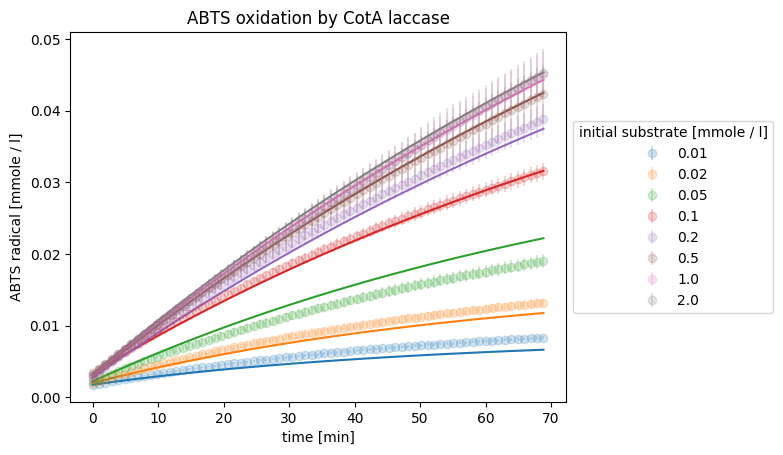

In [89]:
# Parameter estimation without time-dependent enzyme inactivation
CotA_kinetics = ParameterEstimator.from_EnzymeML(enzmldoc, "s1", "product")
CotA_kinetics.fit_models(enzyme_inactivation=False, display_output=False, stop_time_index=-1)
df = CotA_kinetics.result_dict.drop(columns=["kcat / Km [1/min * 1/mmole / l]"])
df.insert(1, "Enzyme inactivation model", "False")

# Parameter estimation considering time-dependent enzyme inactivation
CotA_kinetics_with_inactivation = ParameterEstimator.from_EnzymeML(enzmldoc, "s1", "product")
CotA_kinetics_with_inactivation.fit_models(enzyme_inactivation=True, display_output=False, stop_time_index=-1)
df_inactivation = CotA_kinetics_with_inactivation.result_dict.drop(columns=["kcat / Km [1/min * 1/mmole / l]"])
df_inactivation.insert(1, "Enzyme inactivation model", "True")

results = df.append(df_inactivation).sort_values("AIC")
display(results.style.set_table_attributes('style="font-size: 12px"'))

CotA_kinetics_with_inactivation.visualize("irreversible Michaelis Menten",alpha=0.2)

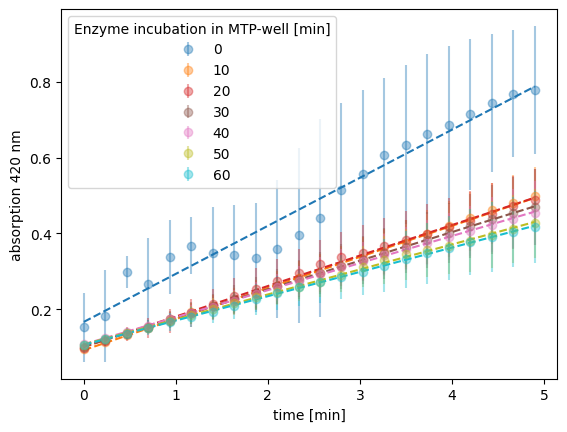

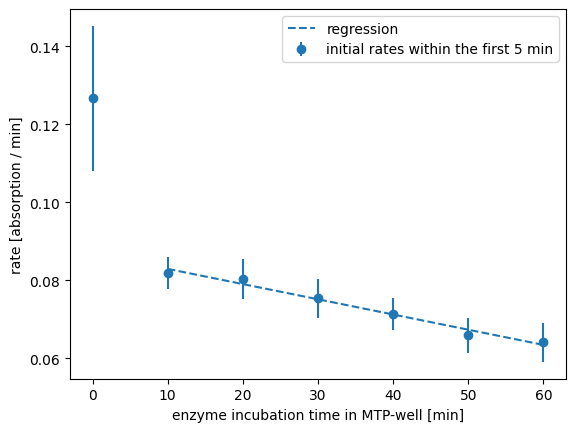

In [91]:
# Load excel
path = '../../data/enzyme_inactivation/Slide 2 - Activity effect of incubating CotA in MTP.xlsx'
df = pd.read_excel(path, sheet_name='csv').set_index('time (min)')

# replace values of '0**' with nan-values, since the measurement is incorrect
df['0**'] = np.nan

# Get data from Excel file
columns = [int(x) for x in list(df.columns) if str(x).endswith("0")]
time = df.index.values
absorption = df.values.T.reshape(7,3,22)
absorption_mean = np.nanmean(absorption, axis = 1)
absorption_std = np.nanstd(absorption, axis = 1)

# Linear regression
slopes = []
intercepts = []
stderrs = []
for time_set in absorption:
    mask = ~np.isnan(time_set)
    time_regression = np.tile(time, 3).reshape(mask.shape)[mask].flatten()
    data_regression = time_set[mask].flatten()
    slope,intercept,_,_,stderr = (linregress(time_regression, data_regression))
    slopes.append(slope)
    intercepts.append(intercept)
    stderrs.append(stderr)

# Regression for the slopes between 10 and 60 mincolumns
slope_of_slopes, intercept_of_slopes,_,_,_ = linregress(columns[1:], slopes[1:])

# Half life
t12 = (np.log(0.5)/np.log(1+slope_of_slopes))/60

# Plot results
colors = cm.tab10(np.linspace(0, 1, len(absorption)))
fig, axes = plt.subplots(2,1, figsize=(12.8,4.8), sharey=False, sharex=False)

for mean, std, label, slope, intercept, color in zip(absorption_mean, absorption_std, columns, slopes, intercepts, colors):
    plt.errorbar(time, mean, std, fmt='o', label=label, alpha = 0.4, color=color)
    plt.plot(np.array(time), np.array(time)*slope+intercept, '--', color=color)
    plt.legend(title="Enzyme incubation in MTP-well [min]")
    plt.ylabel('absorption 420 nm')
    plt.xlabel('time [min]')
plt.show()


plt.errorbar(columns, slopes, stderrs, fmt='o', label="initial rates within the first 5 min")
plt.xlabel("enzyme incubation time in MTP-well [min]")
plt.ylabel('rate [absorption / min]')
plt.plot(np.array(columns[1:]), slope_of_slopes*np.array(columns[1:])+intercept_of_slopes, "--", color=colors[0], label=f"regression")
plt.legend()
plt.show()